(C:digital-images:displaying)=
# Displaying an image

Displaying an image needs to convert the pixel intensities $\{i_1,\dots,i_B\}$ in gray levels or colors.
Screens are basically a matrix of pixels, each composed of red, green and blue luminophores
(the shape, size and number of luminophore depends of the technology).
The colors can be recreated by tuning the luminophore intensities,
thanks to [additive color](https://en.wikipedia.org/wiki/Additive_color).
The correspondance between the numerical value of the intensities and colors on screen
is visually reprensented by a _colormap_.

## Displaying a 2D grayscale image

A 2D grayscale image is an array with $d=2$ dimensions where each pixel contains a scalar ($B=1$).
Therefore, each pixel is displayed with a specific gray level.
{numref}`F:intro:colormap` shows the same image with different colormaps.
As you can see, the choice of the colormap changes the perception of the colors,
even if the information contained by the pixels remains the same.

```{figure} colormaps.svg
---
name: F:intro:colormap
---
An image showing Buzz Aldrin displayed with the colormaps given below the images.
```

Colormaps are sometimes useful to bring out dark objects in an image with poor contrast.
The code below shows an image with one bright spot, clearly visible on the first image,
and four faint spots which are not visible with the usual colormap "gray".
However, another colormap (the socalled "jet" colormap) makes the spots visible.
Also, displaying the logarithm of the image helps to make the spots visible (see [Histogram transformations](C:histogram-transformations)).

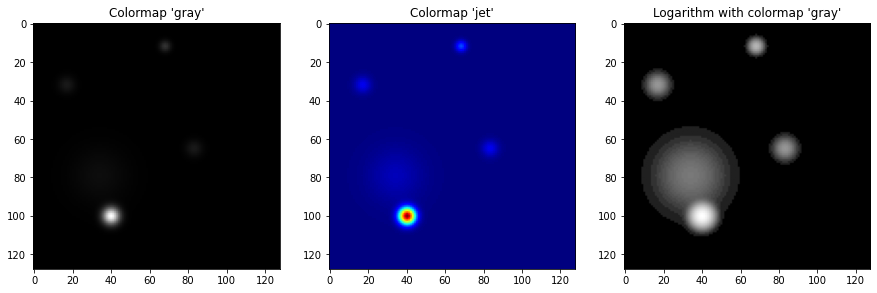

In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load the image
img = io.imread("../_static/figs/spots.png")

# Prepare the figure with three images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display the image with colormap gray
axs[0].imshow(img, cmap="gray")
axs[0].set_title("Colormap 'gray'")

# Display the image with colormap jet
axs[1].imshow(img, cmap="jet" )
axs[1].set_title("Colormap 'jet'")

# Display the logarithm of the image
img_log = np.log(1. + img)
axs[2].imshow(img_log, cmap="gray")
axs[2].set_title("Logarithm with colormap 'gray'")

# Show the figure
plt.show()

## Displaying a 2D color image

As we have seen in [](C:digital-images:eye), the retina of human eye contains three kinds of cone cells
which are basically sensitive to blue, green and red light.
So, a color image is simply to be a composition of the intensities of this three wavelength, so that $B=3$.
Each of this three bands codes the intensity of red, green and blue lights of the image, hence the name RGB (red, green, blue).
This is the reason why digital screens are made of red, green and blue luminophores,
which are small dots composing the pixels.

## Displaying other types of images

There is no easy way to display an image which is not a 2D grayscale or RGB image.
This kind of image are either not displayed, or a specific representation must be chosen.
For example, only three bands can be selected and displayed as a RGB image.
Another possibility is to gather the bands into three groups and to compute the means in each group,
the latter become the three bands of a usual RGB image.

<!-- niveau gris, images en fausses couleurs -->